# Test Arnoldi iterations

In [1]:
# import 
import numpy as np
from prettytable import PrettyTable
from numpy.linalg import eig
from arnoldi_iteration import arnoldi_iteration,QR_algorithm,func_ ,func_2
from arnoldi_norm import arnoldi_norm 

In [3]:
# loading the matrices
M1 = np.loadtxt('../CGD/data/M1.txt')
x0_m1 = np.loadtxt('../CGD/data/x0_m1.txt')

M2 = np.loadtxt('../CGD/data/M2.txt')
x0_m2 = np.loadtxt('../CGD/data/x0_m2.txt')

M3 = np.loadtxt('../CGD/data/M3.txt')
x0_m3 = np.loadtxt('../CGD/data/x0_m3.txt')

M4 = np.loadtxt('../CGD/data/M4.txt')
x0_m4 = np.loadtxt('../CGD/data/x0_m4.txt')

M5 = np.loadtxt('../CGD/data/M5.txt')
x0_m5 = np.loadtxt('../CGD/data/x0_m5.txt')

# utility function for display    
def table(c_norm,t_norm,i_conv):
    A = PrettyTable()
    
    A.add_row(['Computed matrix norm ‖A‖₂', c_norm])
    A.add_row(["True norm ‖A‖₂",t_norm])
    A.add_row(["Iterative convergence",i_conv])
    
    print(A)  

## M1 - Matrix Test

In [3]:
print("############# Test-1 ############")
prod = func_(M1)
    
# Initialize the Arnoldi algorithm.
arnoldi_norm_m1 = arnoldi_norm(prod,x0_m1,100) 
    
# Run the algorithm.
matrix_norm_m1,Iterative_convergence_m1 , λ_m1 = arnoldi_norm_m1.arnoldi_norm() 

true_norm = np.linalg.norm(M1, ord=2)
table(matrix_norm_m1,true_norm,Iterative_convergence_m1)    



############# Test-1 ############
+---------------------------+-------------------+
|          Field 1          |      Field 2      |
+---------------------------+-------------------+
| Computed matrix norm ‖A‖₂ | 99.99999999999828 |
|       True norm ‖A‖₂      | 99.99999999999976 |
|   Iterative convergence   |         19        |
+---------------------------+-------------------+


In [4]:
%%timeit -r 10
# Measuring running time
arnoldi_norm_m1.arnoldi_norm()

368 ms ± 8.91 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [5]:
%%timeit -r 10
# Measuring running time
np.linalg.norm(M1, ord=2)

173 ms ± 11.4 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


###  M1 - Arnoldi convergence rates 

In [6]:
# Ritz values  λ , exact eigenvalues x

# exact eigenvalues x
x,w =eig(prod)

# Exctracting the top 5 eigenvalue(Ritz values  λ) while changing the number of itration i.e n = 5 to 50 
ritz_values_perItration = []
for i in range(5,50): 
    H_i = arnoldi_iteration(prod, x0_m1, i)
    ritz_values = QR_algorithm(H_i)
    ritz_values_perItration.append(ritz_values[:5])
   
# Arranging Ritz values by picking Ritz values  form each itration 
eigs = []
for i in range (5):
    for j in range(45): 
        eigs.append(ritz_values_perItration[j][i])   
   

eigs = np.array_split(np.array(eigs),5)

# convergence rates (as absolute errors |x−λ|) as a function of the number of iterations
error_eigs = []
for i in range(5):
    error_eigs.append(abs(x[i] - eigs[i]))
        

  

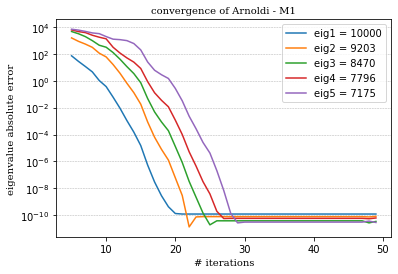

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
font1 = {'family':'serif','color':'black','size':10}

x = list(range(5,50))
y,y2,y3,y4,y5 =  [error_eigs[i] for i in range(5)] 


plt.plot(x, y,label  = "eig1 = 10000")
plt.plot(x, y2,label = "eig2 = 9203")
plt.plot(x, y3,label = "eig3 = 8470")
plt.plot(x, y4,label = "eig4 = 7796")
plt.plot(x, y5,label = "eig5 = 7175")
plt.yscale('log')
plt.legend()
plt.title("convergence of Arnoldi - M1", fontdict = font1,loc = 'center')
plt.xlabel("# iterations", fontdict = font1)
plt.ylabel("eigenvalue absolute error", fontdict = font1)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.savefig('M1.png')
plt.show()



# M2 - Matrix Test

In [4]:
print("############# Test-2 ############")
prod = func_2(M2)
    
# Initialize the Arnoldi algorithm.
arnoldi_norm_m2 = arnoldi_norm(prod,x0_m2,20) 
    
# Run the algorithm.
matrix_norm_m2,Iterative_convergence_m2 , λ_m2 = arnoldi_norm_m2.arnoldi_norm() 
    
true_norm = np.linalg.norm(M2, ord=2)
table(matrix_norm_m2,true_norm,Iterative_convergence_m2) 

############# Test-2 ############


KeyboardInterrupt: 

In [14]:
%%timeit -r 10
# Measuring running time
arnoldi_norm_m2.arnoldi_norm()

1.13 s ± 4.95 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [18]:
%%timeit -r 10
# Measuring running time
np.linalg.norm(M2, ord=2)

1.72 ms ± 119 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


###  M2 - Arnoldi convergence rates 

In [19]:
# Ritz values  λ , exact eigenvalues x

# exact eigenvalues x
x,w =eig(prod)

# Exctracting the top 5 eigenvalue(Ritz values  λ) while changing the number of itration i.e n = 5,10,15,20,25,30,35,40
ritz_values_perItration = []
for i in range(5,20): 
    H_i = arnoldi_iteration(prod, x0_m2, i)
    ritz_values = QR_algorithm(H_i)
    ritz_values_perItration.append(ritz_values[:5])
   
# Arranging Ritz values by picking Ritz values  form each itration 
eigs = []
for i in range (5):
    for j in range(15): 
        eigs.append(ritz_values_perItration[j][i])   
   

eigs = np.array_split(np.array(eigs),5)

# convergence rates (as absolute errors |x−λ|) as a function of the number of iterations
error_eigs_m2 = []
for i in range(5):
    error_eigs_m2.append(abs(x[i] - eigs[i]))
        

  

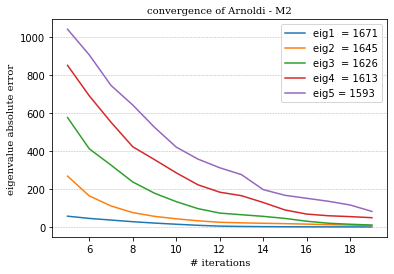

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
font1 = {'family':'serif','color':'black','size':10}

x = list(range(5,20))
y,y2,y3,y4,y5 =  [error_eigs_m2[i] for i in range(5)] 


plt.plot(x, y,label  = "eig1  = 1671")
plt.plot(x, y2,label = "eig2  = 1645")
plt.plot(x, y3,label = "eig3  = 1626")
plt.plot(x, y4,label = "eig4  = 1613")
plt.plot(x, y5,label = "eig5 = 1593")
#plt.yscale('log')
plt.legend()
plt.title("convergence of Arnoldi - M2", fontdict = font1,loc = 'center')
plt.xlabel("# iterations", fontdict = font1)
plt.ylabel("eigenvalue absolute error", fontdict = font1)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.savefig('M2.png')
plt.show()



## M3 - Matrix Test

In [5]:
print("############# Test-3 ############")
prod = func_2(M3)
    
# Initialize the Arnoldi algorithm.
arnoldi_norm_m3 = arnoldi_norm(prod,x0_m3,100) 
    
# Run the algorithm.
matrix_norm_m3,Iterative_convergence_m3 , λ_m3 = arnoldi_norm_m3.arnoldi_norm() 
    
true_norm = np.linalg.norm(M3, ord=2)
table(matrix_norm_m3,true_norm,Iterative_convergence_m3)     


############# Test-3 ############
+---------------------------+-------------------+
|          Field 1          |      Field 2      |
+---------------------------+-------------------+
| Computed matrix norm ‖A‖₂ | 41.06555327364788 |
|       True norm ‖A‖₂      | 41.06555327364636 |
|   Iterative convergence   |         35        |
+---------------------------+-------------------+


In [65]:
%%timeit -r 10
# Measuring running time
arnoldi_norm_m3.arnoldi_norm()

4.33 s ± 123 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [67]:
%%timeit -r 10
# Measuring running time
np.linalg.norm(M3, ord=2)

2.34 ms ± 55.7 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


### M3 - Arnoldi convergence rates 

In [6]:
# Ritz values  λ , exact eigenvalues x

# exact eigenvalues x
x,w =eig(prod)

# Exctracting the top 5 eigenvalue(Ritz values  λ) while changing the number of itration i.e n = 5,10,15,20,25,30,35,40
ritz_values_perItration = []
for i in range(5,50): 
    H_i = arnoldi_iteration(prod, x0_m3, i)
    ritz_values = QR_algorithm(H_i)
    ritz_values_perItration.append(ritz_values[:5])
   
# Arranging Ritz values by picking Ritz values  form each itration 
eigs = []
for i in range (5):
    for j in range(45): 
        eigs.append(ritz_values_perItration[j][i])   
   

eigs = np.array_split(np.array(eigs),5)

# convergence rates (as absolute errors |x−λ|) as a function of the number of iterations
error_eigs_m3 = []
for i in range(5):
    error_eigs_m3.append(abs(x[i] - eigs[i]))
        

  

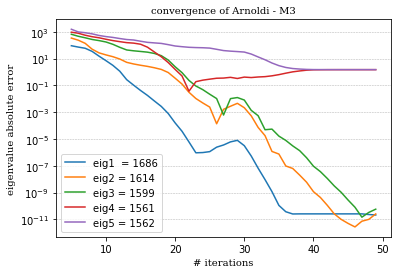

In [7]:
import matplotlib.pyplot as plt
import numpy as np

font1 = {'family':'serif','color':'black','size':10}

x = list(range(5,50))
y,y2,y3,y4,y5 =  [error_eigs_m3[i] for i in range(5)] 


plt.plot(x, y,label  = "eig1  = 1686")
plt.plot(x, y2,label = "eig2 = 1614")
plt.plot(x, y3,label = "eig3 = 1599")
plt.plot(x, y4,label = "eig4 = 1561")
plt.plot(x, y5,label = "eig5 = 1562")
plt.yscale('log')
plt.legend()
plt.title("convergence of Arnoldi - M3", fontdict = font1,loc = 'center')
plt.xlabel("# iterations", fontdict = font1)
plt.ylabel("eigenvalue absolute error", fontdict = font1)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.savefig('M3.png')
plt.show()



# M4 - Matrix Test

In [6]:
print("############# Test-4 ############")
prod = func_(M4)
    
# Initialize the Arnoldi algorithm.
arnoldi_norm_m4 = arnoldi_norm(prod,x0_m4,100) 
    
# Run the algorithm.
matrix_norm_m4,Iterative_convergence_m4 , λ_m4 = arnoldi_norm_m4.arnoldi_norm() 

    
true_norm = np.linalg.norm(M4, ord=2)
table(matrix_norm_m4,true_norm,Iterative_convergence_m4)

############# Test-4 ############
+---------------------------+--------------------+
|          Field 1          |      Field 2       |
+---------------------------+--------------------+
| Computed matrix norm ‖A‖₂ | 19.510910541441053 |
|       True norm ‖A‖₂      | 19.510910541480246 |
|   Iterative convergence   |         22         |
+---------------------------+--------------------+


In [23]:
%%timeit -r 10
# Measuring running time
arnoldi_norm_m4.arnoldi_norm()

440 ms ± 9.53 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [70]:
%%timeit -r 10
# Measuring running time
np.linalg.norm(M4, ord=2)

777 µs ± 21.9 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


### M4 - Arnoldi convergence rates 

In [8]:
# Ritz values  λ , exact eigenvalues x

# exact eigenvalues x
x,w =eig(prod)

# Exctracting the top 5 eigenvalue(Ritz values  λ) while changing the number of itration i.e n = 5,10,15,20,25,30,35,40
ritz_values_perItration = []
for i in range(5,50): 
    H_i = arnoldi_iteration(prod, x0_m4, i)
    ritz_values = QR_algorithm(H_i)
    ritz_values_perItration.append(ritz_values[:5])
   
# Arranging Ritz values by picking Ritz values  form each itration 
eigs = []
for i in range (5):
    for j in range(45): 
        eigs.append(ritz_values_perItration[j][i])   
   

eigs = np.array_split(np.array(eigs),5)

# convergence rates (as absolute errors |x−λ|) as a function of the number of iterations
error_eigs_m4 = []
for i in range(5):
    error_eigs_m4.append(abs(x[i] - eigs[i]))
        

  

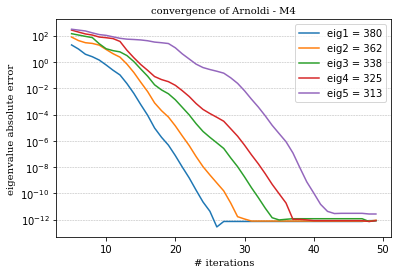

In [9]:
import matplotlib.pyplot as plt
import numpy as np

font1 = {'family':'serif','color':'black','size':10}

x = list(range(5,50))
y,y2,y3,y4,y5 =  [error_eigs_m4[i] for i in range(5)] 


plt.plot(x, y,label  = "eig1 = 380")
plt.plot(x, y2,label = "eig2 = 362")
plt.plot(x, y3,label = "eig3 = 338")
plt.plot(x, y4,label = "eig4 = 325")
plt.plot(x, y5,label = "eig5 = 313")
plt.yscale('log')
plt.legend()
plt.title("convergence of Arnoldi - M4", fontdict = font1,loc = 'center')
plt.xlabel("# iterations", fontdict = font1)
plt.ylabel("eigenvalue absolute error", fontdict = font1)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.savefig('M4.png')
plt.show()





## M5 - Matrix Test

In [3]:
print("############# Test-5 ############")
prod = func_2(M5)
    
# Initialize the Arnoldi algorithm.
arnoldi_norm_m5 = arnoldi_norm(prod,x0_m5,30) 
    
# Run the algorithm.
matrix_norm_m5,Iterative_convergence_m5 , λ_m5 = arnoldi_norm_m5.arnoldi_norm() 

    
true_norm = np.linalg.norm(M5, ord=2)
table(matrix_norm_m5,true_norm,Iterative_convergence_m5)

############# Test-5 ############
+---------------------------+--------------------+
|          Field 1          |      Field 2       |
+---------------------------+--------------------+
| Computed matrix norm ‖A‖₂ | 22.882923885304482 |
|       True norm ‖A‖₂      | 22.88292203102915  |
|   Iterative convergence   |         29         |
+---------------------------+--------------------+


In [50]:
%%timeit -r 10
# Measuring running time
arnoldi_norm_m5.arnoldi_norm()

3.64 s ± 71.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [51]:
%%timeit -r 10
# Measuring running time
np.linalg.norm(M5, ord=2)

1.13 ms ± 91.6 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


### M5 - Arnoldi convergence rates 

In [4]:
# Ritz values  λ , exact eigenvalues x

# exact eigenvalues x
x,w =eig(prod)

# Exctracting the top 5 eigenvalue(Ritz values  λ) while changing the number of itration i.e n = 5,10,15,20,25,30,35,40
ritz_values_perItration = []
for i in range(5,30): 
    H_i = arnoldi_iteration(prod, x0_m4, i)
    ritz_values = QR_algorithm(H_i)
    ritz_values_perItration.append(ritz_values[:5])
   
# Arranging Ritz values by picking Ritz values  form each itration 
eigs = []
for i in range (5):
    for j in range(25): 
        eigs.append(ritz_values_perItration[j][i])   
   

eigs = np.array_split(np.array(eigs),5)

# convergence rates (as absolute errors |x−λ|) as a function of the number of iterations
error_eigs_m5 = []
for i in range(5):
    error_eigs_m5.append(abs(x[i] - eigs[i]))
        

  

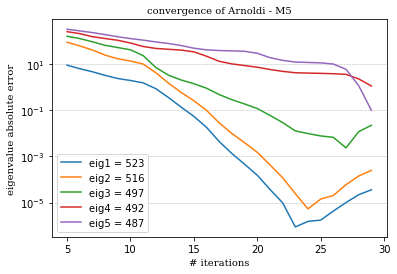

In [5]:
import matplotlib.pyplot as plt
import numpy as np

font1 = {'family':'serif','color':'black','size':10}

x = list(range(5,30))
y,y2,y3,y4,y5 =  [error_eigs_m5[i] for i in range(5)] 


plt.plot(x, y,label  = "eig1 = 523")
plt.plot(x, y2,label = "eig2 = 516")
plt.plot(x, y3,label = "eig3 = 497")
plt.plot(x, y4,label = "eig4 = 492")
plt.plot(x, y5,label = "eig5 = 487")
plt.yscale('log')
plt.legend()
plt.title("convergence of Arnoldi - M5", fontdict = font1,loc = 'center')
plt.xlabel("# iterations", fontdict = font1)
plt.ylabel("eigenvalue absolute error", fontdict = font1)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.savefig('M5.png')
plt.show()



